In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import numpy as np
%matplotlib inline

In [2]:
train = pd.read_csv('hm_train.csv')

In [3]:
train.head()

,hmid,reflection_period,cleaned_hm,num_sentence,predicted_category
0,27673,24h,I went on a successful date with someone I fel...,1,affection
1,27674,24h,I was happy when my son got 90% marks in his e...,1,affection
2,27675,24h,I went to the gym this morning and did yoga.,1,exercise
3,27676,24h,We had a serious talk with some friends of our...,2,bonding
4,27677,24h,I went with grandchildren to butterfly display...,1,affection


In [4]:
print('No. of examples:', len(train))

No. of examples: 60321


####  Let's see the distribution of 'reflection_period'

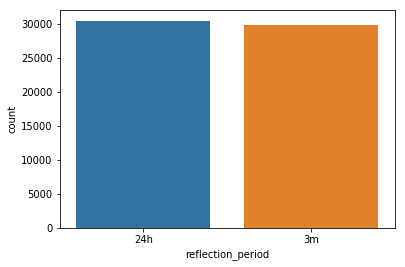

In [5]:
sns.countplot(train.reflection_period)

####  Let's see the distribution of 'num_sentence'

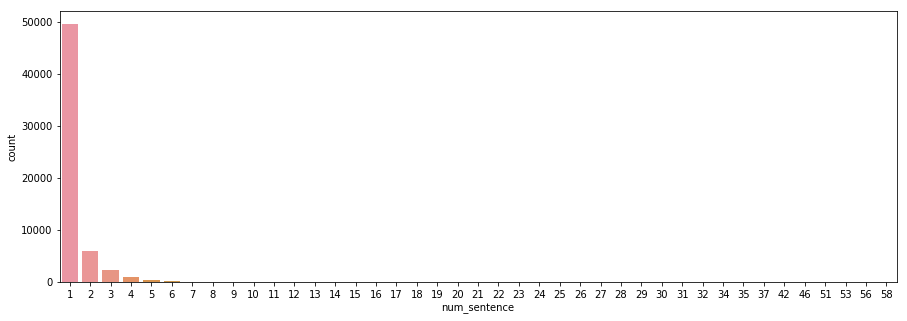

In [6]:
plt.figure(figsize=(15,5))
sns.countplot(train.num_sentence)

####  Let's see the distribution of the targets

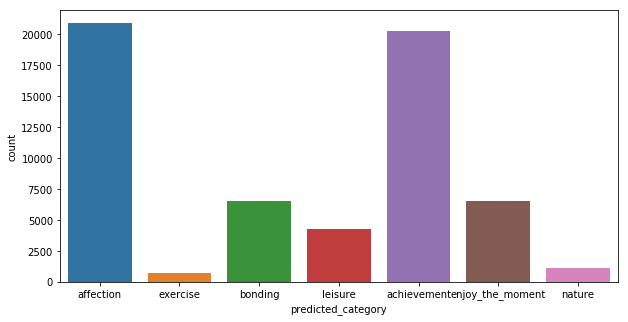

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(train.predicted_category)

####  The distribution isn't uniform

In [8]:
from nltk import word_tokenize

####  Make sure all the tokens (including punctuations) are space separated

In [9]:
for i in tqdm(train.index):
    train.at[i, 'cleaned_hm'] = ' '.join(word_tokenize(train.at[i, 'cleaned_hm']))

100%|██████████| 60321/60321 [00:10<00:00, 5669.81it/s]


In [10]:
train.head()

,hmid,reflection_period,cleaned_hm,num_sentence,predicted_category
0,27673,24h,I went on a successful date with someone I fel...,1,affection
1,27674,24h,I was happy when my son got 90 % marks in his ...,1,affection
2,27675,24h,I went to the gym this morning and did yoga .,1,exercise
3,27676,24h,We had a serious talk with some friends of our...,2,bonding
4,27677,24h,I went with grandchildren to butterfly display...,1,affection


####  See how 'reflection_period', 'num_sentence' and 'predicted_category' correlate with each other

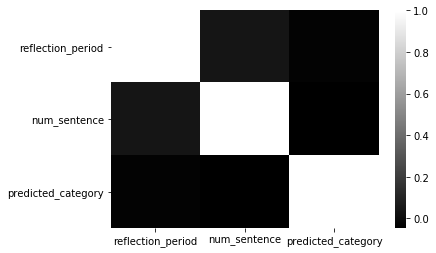

In [11]:
sub_train = train[['reflection_period', 'num_sentence', 'predicted_category']]
corr = sub_train.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
sns.heatmap(corr, cmap='gray')

####  The heatmap suggests that 'num_sentence' and 'reflection_period' dosen't seem to correlate with the targets. Lets remove them.

In [12]:
del train['reflection_period']
del train['num_sentence']

In [13]:
train.head()

,hmid,cleaned_hm,predicted_category
0,27673,I went on a successful date with someone I fel...,affection
1,27674,I was happy when my son got 90 % marks in his ...,affection
2,27675,I went to the gym this morning and did yoga .,exercise
3,27676,We had a serious talk with some friends of our...,bonding
4,27677,I went with grandchildren to butterfly display...,affection


In [14]:
# Saving the cleaned data
train.to_csv('hm_train_cleaned.csv', index=None, header=False)

####  Let's follow the same preprocessing steps with the test data

In [15]:
test = pd.read_csv('hm_test.csv')

In [16]:
test.head()

,hmid,reflection_period,cleaned_hm,num_sentence
0,88305,3m,I spent the weekend in Chicago with my friends.,1
1,88306,3m,We moved back into our house after a remodel. ...,2
2,88307,3m,My fiance proposed to me in front of my family...,1
3,88308,3m,I ate lobster at a fancy restaurant with some ...,1
4,88309,3m,I went out to a nice restaurant on a date with...,5


In [17]:
for i in tqdm(test.index):
    test.at[i, 'cleaned_hm'] = ' '.join(word_tokenize(test.at[i, 'cleaned_hm']))

100%|██████████| 40213/40213 [00:07<00:00, 5243.93it/s]


In [18]:
del test['reflection_period']
del test['num_sentence']

In [19]:
test.head()

,hmid,cleaned_hm
0,88305,I spent the weekend in Chicago with my friends .
1,88306,We moved back into our house after a remodel ....
2,88307,My fiance proposed to me in front of my family...
3,88308,I ate lobster at a fancy restaurant with some ...
4,88309,I went out to a nice restaurant on a date with...


In [20]:
test.to_csv('hm_test_cleaned.csv', index=None, header=False)

####  Do a train-val split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(train[['hmid', 'cleaned_hm']], train['predicted_category'], test_size=5000, random_state=42)

####  Confirm whether the target distributions of the train and val sets are same (they should be)

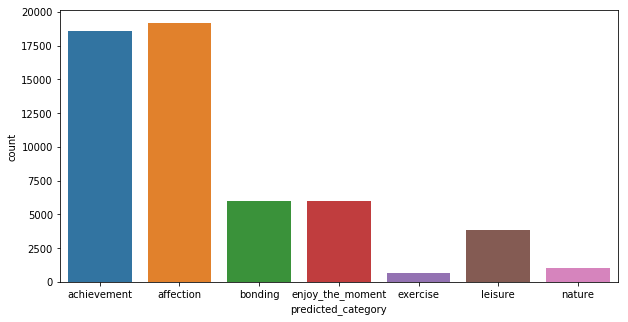

In [23]:
order = np.unique(y_train)
plt.figure(figsize=(10,5))
sns.countplot(y_train, order=order)

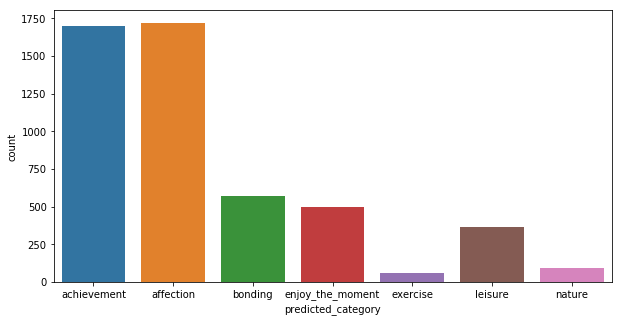

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(y_test, order=order)

####  They are!

In [25]:
X_train['predicted_category'] = y_train

In [26]:
X_test['predicted_category'] = y_test

In [27]:
X_train.head()

,hmid,cleaned_hm,predicted_category
7718,35447,My son dong good on a math test . As an engine...,affection
18035,45812,Hmm we are went to children park today we have...,affection
34291,62155,I finished an art project .,achievement
28422,56254,A friend and I went out for a delicious lunch ...,bonding
25872,53685,My baby grandson arrived this morning to spend...,affection


In [28]:
X_test.head()

,hmid,cleaned_hm,predicted_category
29392,57231,I went shopping and got some new dresses . Sho...,leisure
52280,80220,A happiest moment in past three months was i g...,achievement
18421,46201,My stocks are doing good .,achievement
54374,82326,I received a nice compliment from my boss toda...,achievement
50361,78298,I went to Niagara falls for a beautiful weeken...,affection


In [29]:
X_train.to_csv('train.csv', index=None, header=False)
X_test.to_csv('test.csv', index=None, header=False)